In [2]:
import json
from igraph import Graph

# Leer y parsear el archivo JSON
with open('../input/tests.json', 'r') as f:
    data = json.load(f)

# Extraer nodos y aristas del JSON
nodes = data['nodes']
edges = data['edges']

# Crear un grafo bipartito vacío
g = Graph()

# Añadir nodos al grafo, con el atributo bipartite
for node in nodes:
    g.add_vertex(name=node['id'], label=node['label'], type=node['type'])

# Añadir aristas al grafo y sus atributos
for edge in edges:
    g.add_edge(edge['source'], edge['target'], weight=edge['weight'], relation=edge['relation'])

# Marcar el grafo como bipartito
# La propiedad 'type' de los nodos se utilizará para identificar las dos partes
g.vs["type"] = [node["type"] for node in nodes]

# Mostrar información del grafo
print(g.summary())

# Verificar si el grafo es bipartito
is_bipartite = g.is_bipartite()
print("El grafo es bipartito:", is_bipartite)

# Mostrar los atributos de las aristas
for edge in g.es:
    print(f"Arista entre {edge.source} y {edge.target} con peso {edge['weight']} y relación {edge['relation']}")


IGRAPH UNWT 4 2 -- 
+ attr: label (v), name (v), type (v), relation (e), weight (e)
El grafo es bipartito: True
Arista entre 0 y 1 con peso 1.5 y relación friend
Arista entre 2 y 3 con peso 2.5 y relación colleague


C:\Users\bcriv\AppData\Local\Temp\ipykernel_12256\497454828.py:17: DeprecationWarning: You are using integers as vertex names. This is discouraged because most igraph functions interpret integers as vertex _IDs_ and strings as vertex names. For sake of consistency, convert your vertex names to strings before assigning them. Future versions from igraph 0.11.0 will disallow integers as vertex names.
  g.add_vertex(name=node['id'], label=node['label'], type=node['type'])


In [4]:
g.vs['name']

[0, 1, 2, 3]

In [6]:
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt

# Crear un grafo vacío
g = ig.Graph()

# Añadir vértices, asignando un atributo de tipo
g.add_vertices(5)
g.vs['name'] = ['A', 'B', 'C', 'D', 'E']
g.vs['type'] = [0, 0, 0, 1, 1]

# Añadir aristas
edges = [(0, 3), (0, 4), (1, 3), (2, 4)]
g.add_edges(edges)

# Imprimir el grafo
print(g)

# Obtener la matriz de biadyacencia
biadjacency_matrix = g.get_biadjacency()

# Convertir a un array de numpy
# biadjacency_array = np.array(biadjacency_matrix.data)

# # Imprimir la matriz de biadyacencia
# print("Matriz de biadyacencia:")
# print(biadjacency_array)

# # Visualizar la matriz de biadyacencia usando matplotlib
# plt.imshow(biadjacency_array, cmap='binary', interpolation='none')
# plt.colorbar()
# plt.title("Matriz de Biadyacencia")
# plt.xlabel("Conjunto 2")
# plt.ylabel("Conjunto 1")
# plt.show()


IGRAPH UN-T 5 4 --
+ attr: name (v), type (v)
+ edges (vertex names):
A--D, A--E, B--D, C--E


In [19]:
# numpy array
np.array(biadjacency_matrix[0])

array([[1, 1],
       [1, 0],
       [0, 1]])

In [2]:
import igraph as ig
import matplotlib.pyplot as plt

def plot_graph_clusters(grafo):
    # Detectar comunidades usando el método de clusterización
    clusters = grafo.community_multilevel()
    
    # Obtener los colores para cada vértice según el cluster
    colors = clusters.membership
    
    # Calcular el tamaño de los vértices según su grado
    degrees = grafo.degree()
    vertex_sizes = [deg * 10 for deg in degrees]  # Ajustar el multiplicador según sea necesario
    
    # Configurar la disposición del grafo
    layout = grafo.layout("fr")  # Fruchterman-Reingold layout
    
    # Graficar el grafo
    ig.plot(
        clusters,
        mark_groups=True,
        graph_layout=layout,
        vertex_color=colors,
        vertex_size=vertex_sizes,
        edge_width=1,
        bbox=(800, 800),
        margin=20
    )
    

In [3]:
g = ig.Graph.Erdos_Renyi(n=30, m=45)
plot_graph_clusters(g)

In [21]:
import igraph as ig
import matplotlib.pyplot as plt
import random
random.seed(0)

# Crear un grafo de ejemplo
g = ig.Graph.Erdos_Renyi(n=100, m=200,)
layout = g.layout("fr")

# Ejecutar el algoritmo de Edge Betweenness
communities = g.community_edge_betweenness()

# Convertir a un objeto Clustering
clustering = communities.as_clustering()
# Asignar colores a las comunidades
palette = ig.drawing.colors.ClusterColoringPalette(len(communities))
g.vs['color'] = [palette[communities.membership[i]] for i in range(len(g.vs))]
node_transparency = 0.5
color = [color[:-1] + (node_transparency,) for color in g.vs['color']]
# Plotear el grafo

ig.plot(g, layout=layout, vertex_color=color)


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\bcriv\miniconda3\envs\semillero\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\bcriv\AppData\Local\Temp\ipykernel_1932\1361839616.py", line 16, in <module>
    palette = ig.drawing.colors.ClusterColoringPalette(len(communities))
                                                       ^^^^^^^^^^^^^^^^
TypeError: object of type 'VertexDendrogram' has no len()

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\bcriv\miniconda3\envs\semillero\Lib\site-packages\IPython\core\interactiveshell.py", line 2144, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\bcriv\miniconda3\envs\semillero\Lib\site-packages\IPython\core\ultratb.py", line 1435, in structured_traceback
    return FormattedTB.s

Nodo con mayor centralidad de grado: C
Nodo con mayor centralidad de intermediación: C
Nodo con mayor centralidad de cercanía: C
Nodo con mayor centralidad de autovector: C


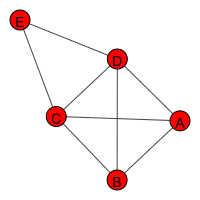

In [6]:
import igraph

# Crear un grafo de ejemplo con nodos nombrados
grafo = igraph.Graph(directed=False)
grafo.add_vertices(["A", "B", "C", "D", "E"])
grafo.add_edges([("A", "B"), ("A", "C"), ("A", "D"), ("B", "C"), ("B", "D"), ("C", "D"), ("C", "E"), ("D", "E")])

# Calcular centralidad de grado
centralidad_grado = grafo.degree()
nodo_max_grado = grafo.vs[centralidad_grado.index(max(centralidad_grado))]["name"]

# Calcular centralidad de intermediación
centralidad_intermediacion = grafo.betweenness()
nodo_max_intermediacion = grafo.vs[centralidad_intermediacion.index(max(centralidad_intermediacion))]["name"]

# Calcular centralidad de cercanía
centralidad_cercania = grafo.closeness()
nodo_max_cercania = grafo.vs[centralidad_cercania.index(max(centralidad_cercania))]["name"]

# Calcular centralidad de autovector
centralidad_autovector = grafo.eigenvector_centrality()
nodo_max_autovector = grafo.vs[centralidad_autovector.index(max(centralidad_autovector))]["name"]

# Imprimir los resultados
print("Nodo con mayor centralidad de grado:", nodo_max_grado)
print("Nodo con mayor centralidad de intermediación:", nodo_max_intermediacion)
print("Nodo con mayor centralidad de cercanía:", nodo_max_cercania)
print("Nodo con mayor centralidad de autovector:", nodo_max_autovector)

igraph.plot(grafo, bbox=(200, 200), vertex_label = grafo.vs['name'], margin=20)